# PakWheels Price Check: Unveiling the Pakistani Used Car Market

## *Made by [Ahmad Shafique](https://www.linkedin.com/in/ahmadshafique443)*

### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### loading data

In [2]:
used_car_data = pd.read_csv('/kaggle/input/pakistan-used-car-prices-2023/pakwheels_used_car_data_v02.csv')

### first few rows of dataframe

In [3]:
used_car_data.head()

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,NaN,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0


### few random data sample

In [4]:
used_car_data.sample(5)

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
76644,7776836,Islamabad,NaN,Sedan,Toyota,Yaris,2022.0,1300.0,Manual,Petrol,Silver,Islamabad,1200,4500000.0
11068,7933537,Chakwal,NaN,SUV,KIA,Sportage,NaN,1999.0,Automatic,Petrol,White,Islamabad,9600,8890000.0
48177,7865193,Mian,NaN,Sedan,Honda,Civic,2020.0,1500.0,Automatic,Petrol,Crystal Black Pearl,Punjab,66000,7000000.0
5644,7939050,Karachi,NaN,Sedan,Toyota,Corolla,2010.0,1800.0,Manual,Petrol,NaN,Karachi,89000,2500000.0
45161,7872778,Lahore,NaN,Hatchback,Suzuki,Alto,2021.0,660.0,Manual,Petrol,White,Lahore,38000,2375000.0


## let's exlpore metadata

In [5]:
used_car_data.shape

(77878, 14)

In [6]:
used_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77878 entries, 0 to 77877
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   addref        77878 non-null  int64  
 1   city          77878 non-null  object 
 2   assembly      24189 non-null  object 
 3   body          68974 non-null  object 
 4   make          77878 non-null  object 
 5   model         77878 non-null  object 
 6   year          73099 non-null  float64
 7   engine        77875 non-null  float64
 8   transmission  77878 non-null  object 
 9   fuel          76972 non-null  object 
 10  color         76398 non-null  object 
 11  registered    77878 non-null  object 
 12  mileage       77878 non-null  int64  
 13  price         77295 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 8.3+ MB


### summary statistics of all columns

In [7]:
used_car_data.describe(include='all')

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
count,7.787800e+04,77878,24189,68974,77878,77878,73099.000000,77875.000000,77878,76972,76398,77878,77878.000000,7.729500e+04
unique,NaN,297,1,21,68,435,NaN,NaN,2,3,396,121,NaN,NaN
top,NaN,Lahore,Imported,Sedan,Toyota,Corolla,NaN,NaN,Automatic,Petrol,White,Islamabad,NaN,NaN
freq,NaN,16674,24189,30193,24910,12871,NaN,NaN,42763,70620,21444,18942,NaN,NaN
mean,7.809878e+06,NaN,NaN,NaN,NaN,NaN,2012.812610,1408.072550,NaN,NaN,NaN,NaN,91109.192750,3.883232e+06
std,2.599523e+05,NaN,NaN,NaN,NaN,NaN,7.516685,704.459947,NaN,NaN,NaN,NaN,89275.336173,5.759480e+06
min,2.748970e+05,NaN,NaN,NaN,NaN,NaN,1990.000000,3.000000,NaN,NaN,NaN,NaN,1.000000,1.100000e+05
25%,7.805760e+06,NaN,NaN,NaN,NaN,NaN,2007.000000,1000.000000,NaN,NaN,NaN,NaN,34000.000000,1.450000e+06
50%,7.865805e+06,NaN,NaN,NaN,NaN,NaN,2015.000000,1300.000000,NaN,NaN,NaN,NaN,80000.000000,2.700000e+06
75%,7.910334e+06,NaN,NaN,NaN,NaN,NaN,2019.000000,1600.000000,NaN,NaN,NaN,NaN,123456.000000,4.500000e+06


### checking duplicate data

In [8]:
used_car_data[used_car_data.duplicated()]

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price


the data have 100% unqiue rows.

### let's work with missing values

In [9]:
used_car_data.isna().sum()

addref              0
city                0
assembly        53689
body             8904
make                0
model               0
year             4779
engine              3
transmission        0
fuel              906
color            1480
registered          0
mileage             0
price             583
dtype: int64

7 out of 14 columns have some missing values. Out of these 7 columns having missing values, 3 columns have less than 1% missing values while column 'assembly' have 70% missing values. let's investigate these columns one by one

In [10]:
used_car_data['assembly'].value_counts()

assembly
Imported    24189
Name: count, dtype: int64

if the DataFrame only contains the value "Imported" for assembly, then any missing values in the assembly column must be "Local". This is because there are no other possible values for assembly according to original data source. Therefore, we will replace all NaN values in the assembly column with "Local"

In [11]:
used_car_data['assembly'] = used_car_data['assembly'].fillna('Local')
assert used_car_data['assembly'].isna().sum() == 0

In [12]:
used_car_data['body'].value_counts()

body
Sedan                30193
Hatchback            25014
SUV                   5087
Crossover             2156
Mini Van              1337
Compact sedan          793
MPV                    786
Double Cabin           779
Van                    716
Micro Van              539
Pick Up                521
Compact SUV            476
Station Wagon          230
Coupe                   90
Truck                   86
High Roof               74
Convertible             47
Single Cabin            26
Off-Road Vehicles       12
Mini Vehicles            8
Compact hatchback        4
Name: count, dtype: int64

In [13]:
used_car_data[used_car_data['body'].isna()].head(10)

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
30,7896546,Lahore,Imported,NaN,Toyota,Yaris,2020.0,1000.0,Automatic,Petrol,White,Un-Registered,32745,5390000.0
34,7933596,Lahore,Imported,NaN,Toyota,Yaris,2021.0,1500.0,Automatic,Hybrid,White,Un-Registered,17449,10800000.0
49,7943719,Karachi,Imported,NaN,Nissan,Dayz,2014.0,660.0,Automatic,Petrol,Black,Karachi,93000,2250000.0
58,7943688,Islamabad,Imported,NaN,Suzuki,Alto,2009.0,660.0,Automatic,Petrol,White,Islamabad,123,1550000.0
61,7943694,Islamabad,Imported,NaN,Honda,Vezel,2014.0,1500.0,Automatic,Hybrid,White,Islamabad,110000,4740000.0
82,7943660,Hyderabad,Local,NaN,Adam,Revo,2022.0,2800.0,Automatic,Diesel,Black,Sindh,15000,15000000.0
92,7943684,Gujranwala,Local,NaN,Suzuki,Baleno,2005.0,1500.0,Automatic,Petrol,Beige,Lahore,137000,1600000.0
94,7764607,Karachi,Imported,NaN,Nissan,Sunny,1991.0,1000.0,Manual,NaN,White,Karachi,200000,400000.0
106,7926462,Karachi,Imported,NaN,Toyota,Corolla,2020.0,1500.0,Automatic,Hybrid,White,Sindh,4000,9000000.0
114,7943640,Lahore,Local,NaN,Suzuki,Cultus,2018.0,1000.0,Automatic,Petrol,Silver,Punjab,65000,2870000.0


The 'body' column initially had 8,904 missing values, accounting for approx 11% of our total data. To address this, I used a technique that replaced the missing 'body' values with the most frequent 'body' type for the same 'model'. I applied this technique specifically to the 'model' with the highest number of missing values. As a result, the number of missing 'body' values was reduced from 8904 to 2197. I chose not to run this algorithm on the entire dataset to maintain data quality. The 2197 data points that are still missing constituted only about 3% of our data, so dropping them would'nt significantly impact our overall dataset.

In [14]:
model_list = pd.DataFrame(used_car_data[used_car_data['body'].isna()]['model'].value_counts().head(50)).index
print('No of missing values before replacing', used_car_data['body'].isna().sum())
model_body = {}
for model in model_list:
    model_body[model] = used_car_data[used_car_data['model']==model]['body'].value_counts().idxmax()
used_car_data['body'] = used_car_data['body'].fillna(used_car_data['model'].map(model_body))
print('No of missing values after replacing', used_car_data['body'].isna().sum())

No of missing values before replacing 8904
No of missing values after replacing 2197


"year" column have about 6% missing values at random so we will drop rows having missing values.

In [15]:
used_car_data = used_car_data[~used_car_data['year'].isna()]
assert used_car_data['year'].isna().sum() == 0

In [16]:
print(used_car_data[(used_car_data['model']=='Passo') & (used_car_data['year']==2017) & (used_car_data['transmission']=='Automatic') & (used_car_data['fuel']=='Petrol')]['engine'].value_counts())
print(used_car_data[(used_car_data['model']=='Passo') & (used_car_data['year']==2018) & (used_car_data['transmission']=='Automatic') & (used_car_data['fuel']=='Petrol')]['engine'].value_counts())

engine
1000.0    48
996.0      2
100.0      1
Name: count, dtype: int64
engine
1000.0    77
996.0      7
Name: count, dtype: int64


We have only 2 missing values in the 'engine' column. Upon examining the rows with missing data, we found that both cars share similar characteristics, differing only in their year of manufacture by one year. Further exploration revealed that other cars with similar specifications in the dataset have a 1000cc engine. Therefore, we will replace the NaN values in the 'engine' column with 1000.

In [17]:
used_car_data['engine'] = used_car_data['engine'].fillna(1000)

Now we are left with three columns: fuel, color, and price. These three columns have very few missing values, and we can't replace them using the mean/median technique otherwise, the data quality will be ruined. Therefore, it would be better to simply drop these rows, as they will not significantly affect our analysis.

In [18]:
used_car_data = used_car_data.dropna()

In [19]:
used_car_data.shape

(68758, 14)

In [20]:
used_car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68758 entries, 0 to 77877
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   addref        68758 non-null  int64  
 1   city          68758 non-null  object 
 2   assembly      68758 non-null  object 
 3   body          68758 non-null  object 
 4   make          68758 non-null  object 
 5   model         68758 non-null  object 
 6   year          68758 non-null  float64
 7   engine        68758 non-null  float64
 8   transmission  68758 non-null  object 
 9   fuel          68758 non-null  object 
 10  color         68758 non-null  object 
 11  registered    68758 non-null  object 
 12  mileage       68758 non-null  int64  
 13  price         68758 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 7.9+ MB


Finally, our dataset is free from all missing values and rows reduces from 77878 to 68758. It implies that we still have more than 88% of our original dataset for further data analysis.

### Changing Data Types

In [21]:
new_used_car_data = used_car_data.astype({'year':'int16', 'engine':'int16', 'price':'int64'})
new_used_car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68758 entries, 0 to 77877
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   addref        68758 non-null  int64 
 1   city          68758 non-null  object
 2   assembly      68758 non-null  object
 3   body          68758 non-null  object
 4   make          68758 non-null  object
 5   model         68758 non-null  object
 6   year          68758 non-null  int16 
 7   engine        68758 non-null  int16 
 8   transmission  68758 non-null  object
 9   fuel          68758 non-null  object
 10  color         68758 non-null  object
 11  registered    68758 non-null  object
 12  mileage       68758 non-null  int64 
 13  price         68758 non-null  int64 
dtypes: int16(2), int64(3), object(9)
memory usage: 7.1+ MB


## Exploratory Data Analysis

In [22]:
used_car_data.sample(5)

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
42774,7878258,Lahore,Local,Sedan,Honda,Civic,2003.0,1600.0,Automatic,Petrol,Brown,Sindh,7000,1650000.0
75816,7780255,Lahore,Local,Hatchback,Suzuki,Mehran,1993.0,800.0,Manual,Petrol,Snow White Pearl,Karachi,30000,450000.0
35135,7894945,Rawalpindi,Local,Sedan,Suzuki,Liana,2007.0,1300.0,Manual,Petrol,Pearl Black,Rawalpindi,95000,1125000.0
67096,7628932,Rawalpindi,Local,Hatchback,Suzuki,Mehran,2011.0,800.0,Manual,Petrol,Blue,Islamabad,70000,890000.0
2974,7940867,Lahore,Local,SUV,KIA,Sportage,2020.0,1999.0,Automatic,Petrol,White,Punjab,38000,7190000.0


## City wise trend of car sales

In [23]:
city_counts = used_car_data['city'].value_counts().head(16)
cities_list = {'city': city_counts.index.tolist(), 'ads': city_counts.values.tolist()}
cities_list['city'].append('others')
cities_list['ads'].append(used_car_data.shape[0] - np.array(cities_list['ads']).sum())

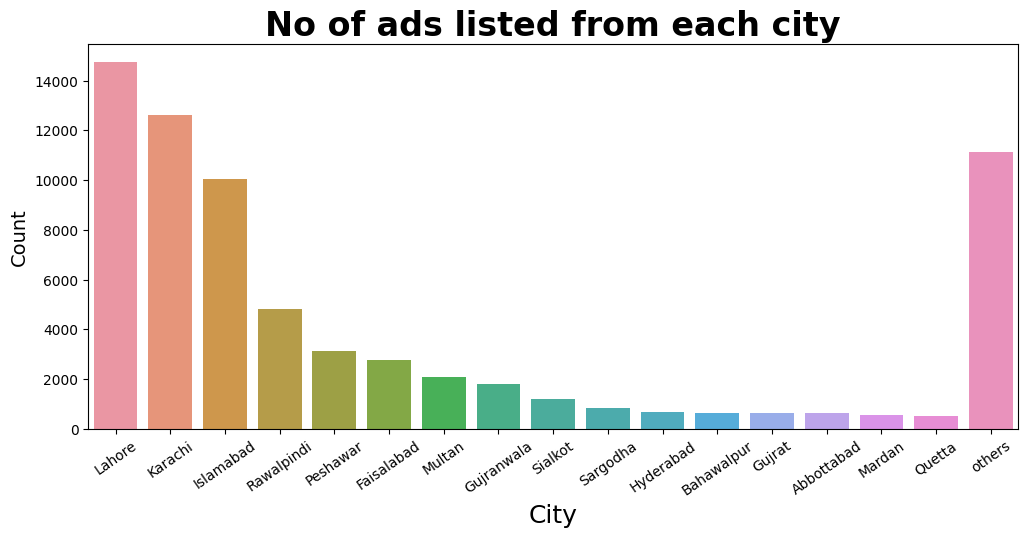

In [24]:
plt.figure(figsize=(12,5))
sns.barplot(y=cities_list['ads'], x = cities_list['city'])
plt.title('No of ads listed from each city', fontdict ={'fontweight':'bold','fontsize':24})
plt.xticks(rotation=35)
plt.xlabel('City', fontdict ={'fontsize':18})
plt.ylabel('Count', fontdict ={'fontsize':14})
plt.show()

#### Observation: The majority of the vehicles listed on PakWheels originate from capital cities, with over 50% of them coming from the Punjab region.

## Assembly of cars

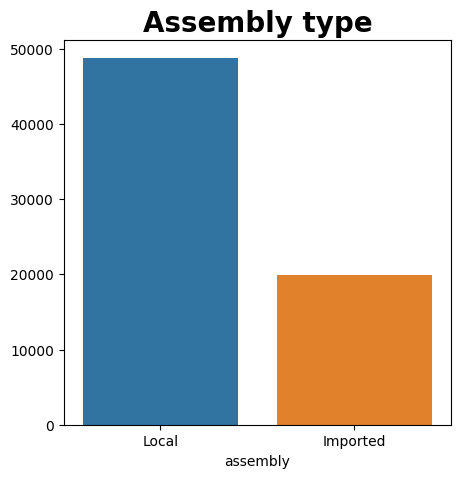

In [25]:
plt.figure(figsize=(5,5))
sns.barplot(x=used_car_data['assembly'].value_counts().index, y=used_car_data['assembly'].value_counts().values)
plt.title('Assembly type', fontdict ={'fontweight':'bold','fontsize':20})
plt.show()

### Observation: There are twice as many locally assembled cars as there are imported ones.

## Most popular car body type

In [26]:
body_counts = used_car_data['body'].value_counts().head(7)
body_list = {'body_type': body_counts.index.tolist(), 'ads': body_counts.values.tolist()}
body_list['body_type'].append('others')
body_list['ads'].append(used_car_data.shape[0] - np.array(body_list['ads']).sum())

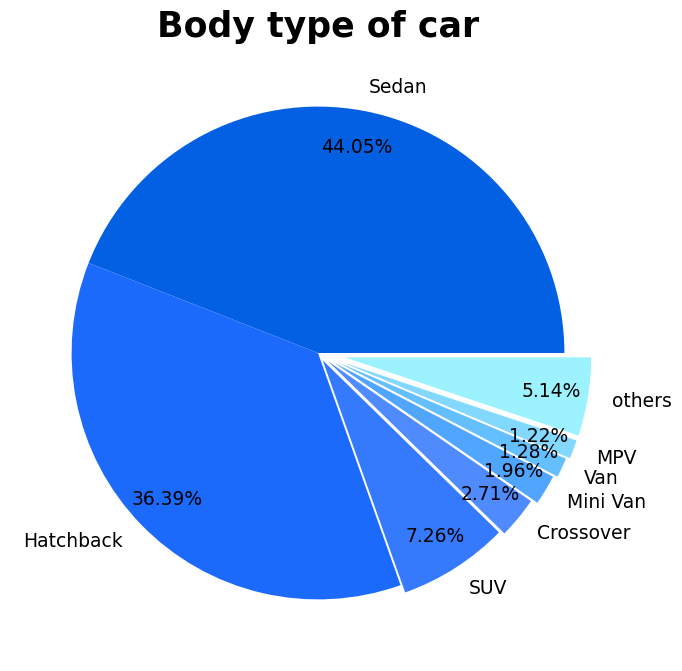

In [27]:
plt.figure(figsize=(8,8))
explode = (0,0,0.035,0.053,0.078, 0.094, 0.108, 0.11)
color = ['#0360e3', '#1c6afc', '#357afd', '#4f8bfd', '#50a6ff', '#64bfff', '#82d8ff', '#9cf2ff', '#9abdfe']
plt.pie(body_list['ads'], labels=body_list['body_type'], explode=explode, autopct='%.2f%%', pctdistance=.85, colors=color, textprops={'fontsize': 13.5})
plt.title('Body type of car', fontdict ={'fontweight':'bold','fontsize':25})
plt.show()

### Observation: Sedan, hatchback and SUV holds more than 85% shares in Pakistani car industry

## Major Car manufacturers

In [28]:
make_counts = used_car_data['make'].value_counts().head(7)
make_list = {'maker': make_counts.index.tolist(), 'count': make_counts.values.tolist()}
make_list['maker'].append('others')
make_list['count'].append(used_car_data.shape[0] - np.array(make_list['count']).sum())

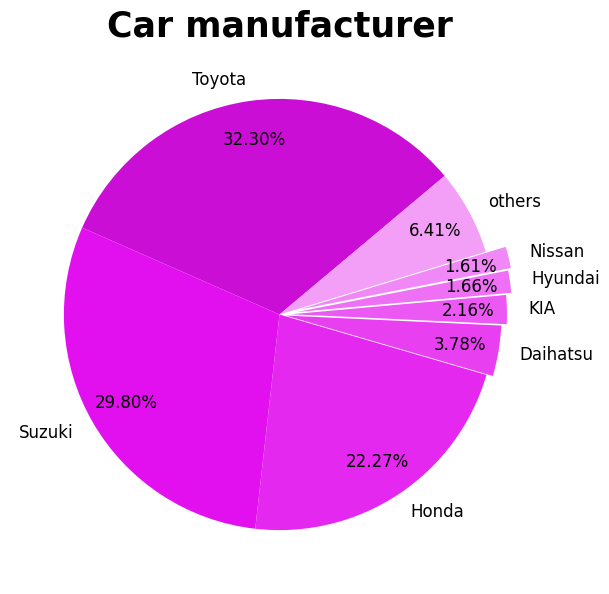

In [29]:
plt.figure(figsize=(7,7))
explode = (0,0,0,0.03,0.055, 0.08, 0.095, 0)
color = ['#cb0ed6', '#e210ee', '#e528f0', '#e840f1', '#eb58f3', '#ee70f5', '#f188f7', '#f39ff8']
plt.pie(make_list['count'], labels=make_list['maker'], explode=explode, autopct='%.2f%%', startangle=40,  pctdistance=.82, colors=color, textprops={'fontsize': 12})
plt.title('Car manufacturer', fontdict ={'fontweight':'bold','fontsize':25})
plt.show()

### Observation: As per given dataset, Toyota, Suzuki, and Honda collectively dominate the market, accounting for 84% of the cars listed for sale on PakWheels.

## Models by each manufacturer

In [30]:
model_per_make = used_car_data.groupby('make').agg(model_make_count=('model','nunique'), body_make_count=('body','nunique')).sort_values(['model_make_count', 'body_make_count'], ascending=False).reset_index()
model_per_make.head(9)

,make,model_make_count,body_make_count
0,Toyota,59,17
1,Suzuki,32,13
2,Honda,28,11
3,Nissan,24,10
4,Daihatsu,19,9
5,Hyundai,13,8
6,Mitsubishi,12,6
7,KIA,11,8
8,Audi,10,4


### first consider 9 major manufacturers only and replace other by a single row for better data visualization

In [31]:
print(model_per_make['model_make_count'].sum() - model_per_make['model_make_count'].head(9).sum())
print(model_per_make['body_make_count'].sum() - model_per_make['body_make_count'].head(9).sum())

95
85


In [32]:
new_row = pd.DataFrame({'make':'Others', 'model_make_count':95, 'body_make_count':85}, index=[0])
model_per_make = model_per_make.head(9)
model_per_make = pd.concat([model_per_make, new_row], ignore_index=True)

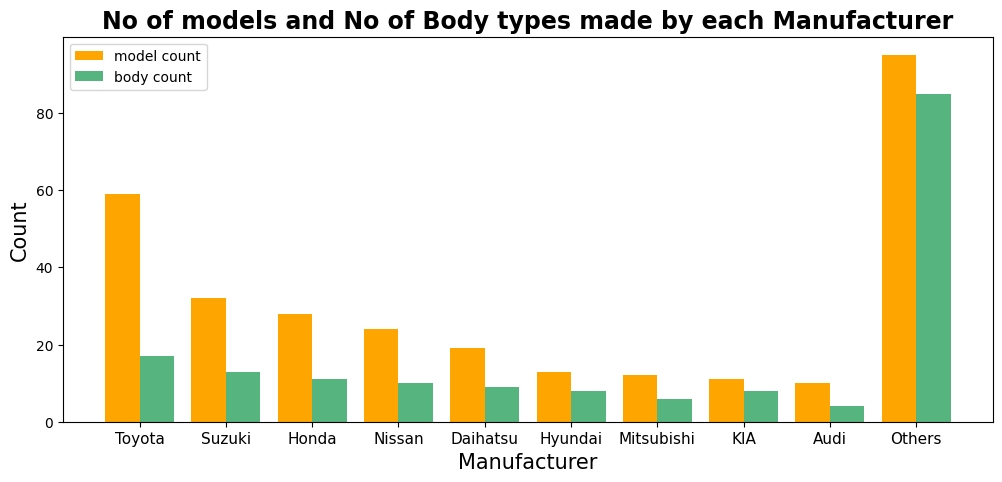

In [33]:
plt.figure(figsize=(12,5))
x_axis = np.arange(len(model_per_make['make']))
plt.bar(x_axis-.2, model_per_make['model_make_count'], .4, label = 'model count', color = '#ffa500')
plt.bar(x_axis+.2, model_per_make['body_make_count'], .4, label = 'body count', color = '#56b47e')
plt.xlabel('Manufacturer', fontdict={'fontsize':15})
plt.ylabel('Count', fontdict={'fontsize':15})
plt.xticks(x_axis, model_per_make['make'], fontsize=11)
plt.title('No of models and No of Body types made by each Manufacturer', fontdict={'weight':'bold', 'fontsize':17})
plt.legend()
plt.show()

### Observation: Looks like Toyota is the market Gaint followed by Suzuki, Honda, Nissan and Daihatsu

### Feature Extraction

The 'year' column contains values ranging from 1990 to 2022. To process further, let's create a new categorical column 'year_range' from existing 'year' column.

In [34]:
def year_category(year):
    if year < 1995:
        return '1990-1994'
    elif year < 2000:
        return '1995-1999'
    elif year < 2005:
        return '2000-2004'
    elif year < 2010:
        return '2005-2009'
    elif year < 2015:
        return '2010-2014'
    elif year < 2020:
        return '2015-2019'
    else:
        return '2020-2024'

In [35]:
used_car_data['year_range'] = used_car_data['year'].apply(lambda x: year_category(x))
used_car_data.sample(3)

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price,year_range
53328,7853095,Lahore,Local,Mini Van,Suzuki,Bolan,2021.0,800.0,Manual,Petrol,Solid White,Lahore,38000,1650000.0,2020-2024
16656,7539142,Lahore,Local,Hatchback,Suzuki,Cultus,2021.0,1000.0,Manual,Petrol,Grey,Lahore,24438,3480000.0,2020-2024
64018,7802557,Faisalabad,Local,Hatchback,Suzuki,Cultus,2004.0,1000.0,Manual,Petrol,White,Faisalabad,94137,730000.0,2000-2004


## Are there more old cars for sale than new ones?

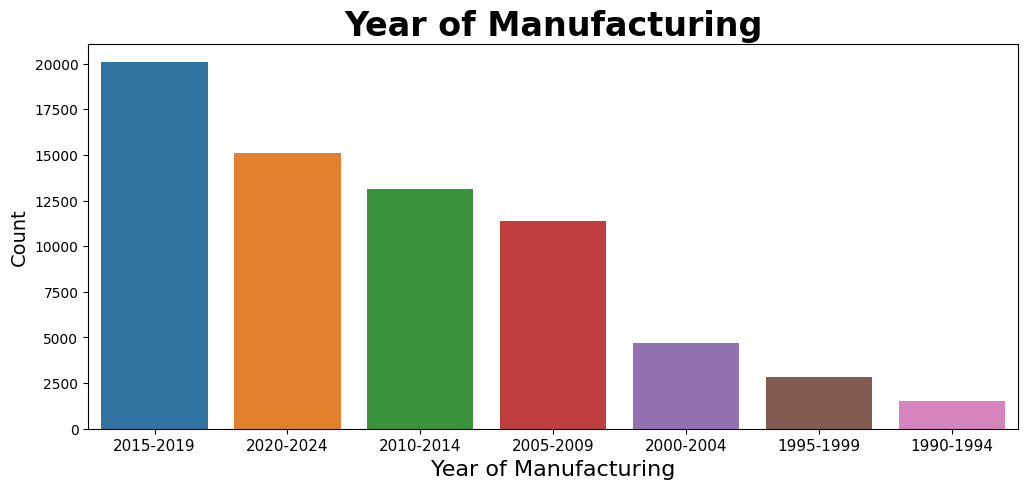

In [36]:
plt.figure(figsize=(12,5))
sns.barplot(x=used_car_data['year_range'].value_counts().index, y = used_car_data['year_range'].value_counts().values)
plt.title('Year of Manufacturing', fontdict ={'fontweight':'bold','fontsize':24})
plt.xlabel('Year of Manufacturing', fontdict ={'fontsize':16})
plt.ylabel('Count', fontdict ={'fontsize':14})
plt.xticks(fontsize=11)
plt.show()

### Observations: It appears that there is a direct correlation between the manufacturing year and the number of ads. Fewer cars listed on PakWheels have older manufacturing years.

## Most popular car model by top 10 manufacturer

In [37]:
used_car_data.groupby(['make', 'model'])[['make', 'model']].size().reset_index().sort_values(by=[0, 'model'], ascending=[False, True]).drop_duplicates(subset=['make'], keep='first').rename(columns={'model':'most popular model', 0:'count'}).head(10)

,make,most popular model,count
251,Toyota,Corolla,11713
83,Honda,Civic,7870
227,Suzuki,Mehran,4379
132,KIA,Sportage,883
54,Daihatsu,Mira,860
150,Mercedes,Benz,536
110,Hyundai,Santro,516
169,Nissan,Dayz,397
139,MG,HS,358
25,Changan,Alsvin,355


## Transmission preference wrt fuel type

In [38]:
transmissio_fuel_data = used_car_data.groupby(['transmission', 'fuel'])[['transmission', 'fuel']].size().reset_index().rename(columns={0:'count'})

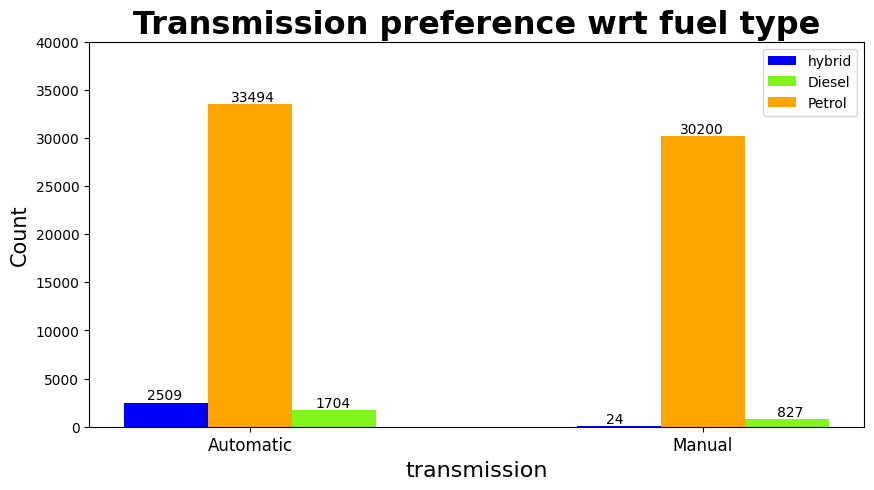

In [39]:
plt.figure(figsize=(10,5))
x_axis = np.array([0,.7])
plt.bar(x_axis-.13, transmissio_fuel_data[transmissio_fuel_data['fuel']=='Hybrid']['count'], .13, label = 'hybrid', color = 'Blue')
plt.bar(x_axis+.13, transmissio_fuel_data[transmissio_fuel_data['fuel']=='Diesel']['count'], .13, label = 'Diesel', color = '#82F51C')
plt.bar(x_axis, transmissio_fuel_data[transmissio_fuel_data['fuel']=='Petrol']['count'], .13, label = 'Petrol', color = 'Orange')
plt.xlabel('transmission', fontdict={'fontsize':16})
plt.ylabel('Count', fontdict={'fontsize':15})
plt.xticks(x_axis, ['Automatic', 'Manual'], fontsize=12)
plt.title('Transmission preference wrt fuel type', fontdict={'weight':'bold', 'fontsize':23})
plt.yticks(np.arange(0,41000,5000))
plt.legend()
plt.annotate('2509', (-0.16,2800))
plt.annotate('33494', (-0.03,33800))
plt.annotate('1704', (0.10,2000))
plt.annotate('24', (.55,320))
plt.annotate('827', (.815,1100))
plt.annotate('30200', (.665,30500))
plt.show()

### Observation: People show a preference for automatic hybrid cars over manual hybrid cars. The ratio of automatic petrol cars to manual petrol cars is approximately 1.1:1. In the case of diesel cars, there are twice as many automatic cars as there are manual ones.

## Feature Simplification

### The following block of code maps 381 colors to 45 colors, greatly improving the data quality so that we can visualize it better.

In [40]:
color = ["white", "black", "gray", "grey", "silver", "red", "blue", "green", "brown", "yellow", "orange", "gold", "beige", "bronze", "titanium", "maroon"]
def color_change(color_row):
    for col in color:
        if col in color_row.lower():
            return col.capitalize()
    return color_row.capitalize()
used_car_data['color'] = used_car_data['color'].apply(lambda x: color_change(x))
used_car_data['color'] = used_car_data['color'].replace(['Night blacl', 'Timeless back', 'Galaxy balck'], 'Black')
used_car_data['color'] = used_car_data['color'].replace(['Gray', 'Gun metallic'], 'Grey')
used_car_data['color'] = used_car_data['color'].replace('Rio tomato', 'Red')
used_car_data['color'] = used_car_data['color'].replace('Yellow', 'Gold')
used_car_data['color'] = used_car_data['color'].replace(['Alpine whire', 'Whitw', 'Precious wite pearl', 'Moonstone metallic'], 'White')
used_car_data['color'].nunique()


45

## Popular Car Color

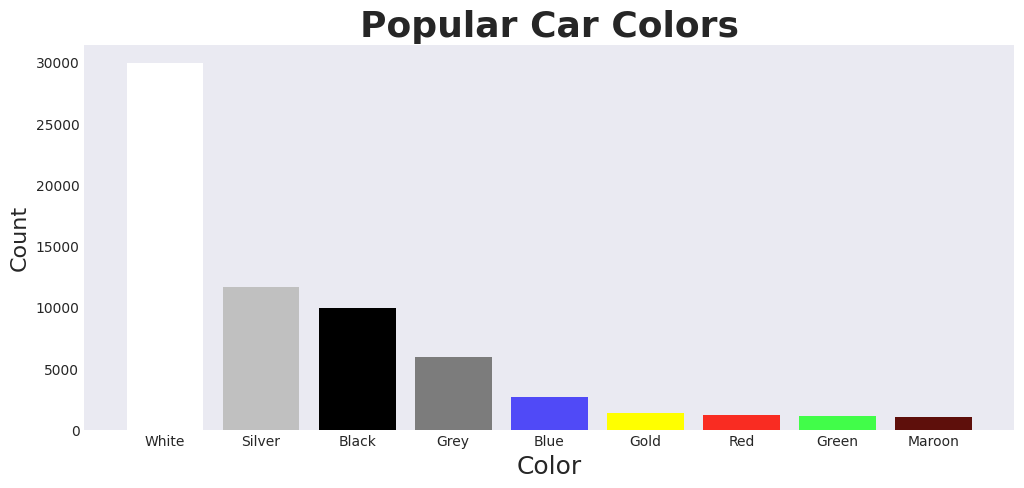

In [41]:
plt.figure(figsize=(12,5))
colors = ['White', '#C0C0C0', 'Black', '#7C7C7C', '#504AF7', 'yellow', '#F92C22', '#41FD49', '#5E0F0B']
plt.style.use('seaborn-dark')
plt.bar(x=used_car_data['color'].value_counts().head(9).index, height=used_car_data['color'].value_counts().head(9).values, color=colors)
plt.title('Popular Car Colors', fontdict ={'fontweight':'bold','fontsize':26})
plt.xlabel('Color', fontdict ={'fontsize':18})
plt.ylabel('Count', fontdict ={'fontsize':16})
plt.show()

### Observation: White remains the most popular car color followed by silver, black and grey

## Car Price Distribution

In [42]:
def format_ticks(value, tick_number):
    return int(value)

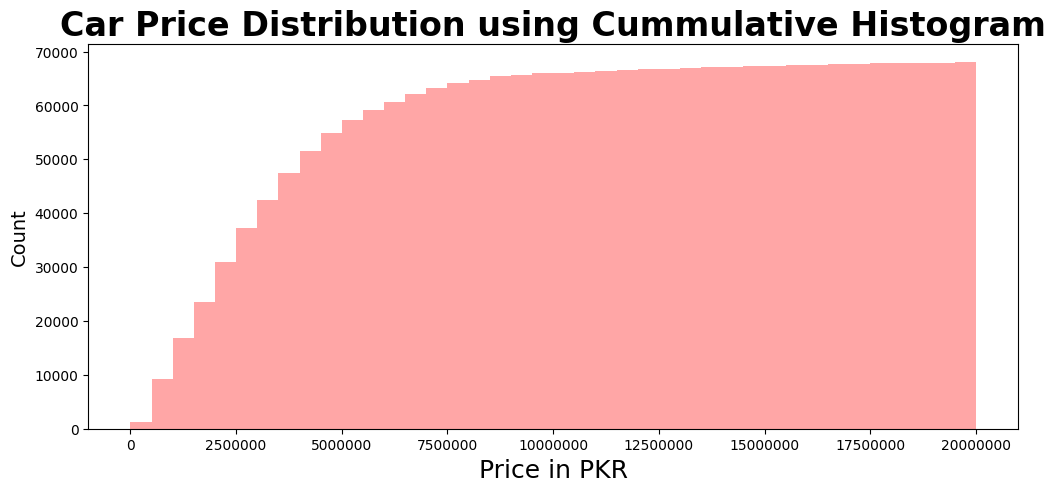

In [43]:
plt.figure(figsize=(12, 5))
plt.style.use('default')
plt.hist(used_car_data['price'], bins=40, cumulative=True, range=(0, 20000000), color=['red'], alpha=.35)
plt.title('Car Price Distribution using Cummulative Histogram', fontdict ={'fontweight':'bold','fontsize':24})
plt.xlabel('Price in PKR', fontdict ={'fontsize':18})
plt.ylabel('Count', fontdict ={'fontsize':14})
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.show()

### Observation: More than 75% car have values under 5000000 PKR. The count of cars decrease as the price goes up.

## Car Price Distribution with respect to Manufacturing Year

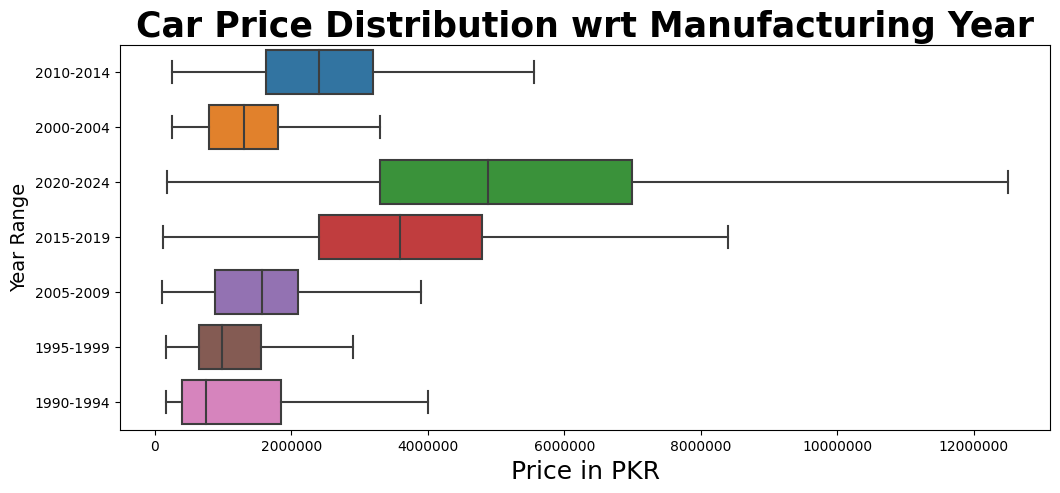

In [44]:
plt.figure(figsize=(12,5))
sns.boxplot(data=used_car_data, x="price", y="year_range", showfliers=False)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.title('Car Price Distribution wrt Manufacturing Year', fontdict ={'fontweight':'bold','fontsize':25})
plt.xlabel('Price in PKR', fontdict ={'fontsize':18})
plt.ylabel('Year Range', fontdict ={'fontsize':14})
plt.show()

### Observation: It appears that the price is directly proportional to the car's manufacturing year, with newer cars having higher prices.

## Is there any car which is registered in a city but listed for sale in another city?

In [45]:
used_car_data['same_city_sale'] = used_car_data['city']==used_car_data['registered']
used_car_data['same_city_sale'].value_counts()

same_city_sale
False    46424
True     22334
Name: count, dtype: int64

### Observation: There are twice as many cars listed for sale in a city are registered in a different city.

## Car Price Distribution wrt Assembly type

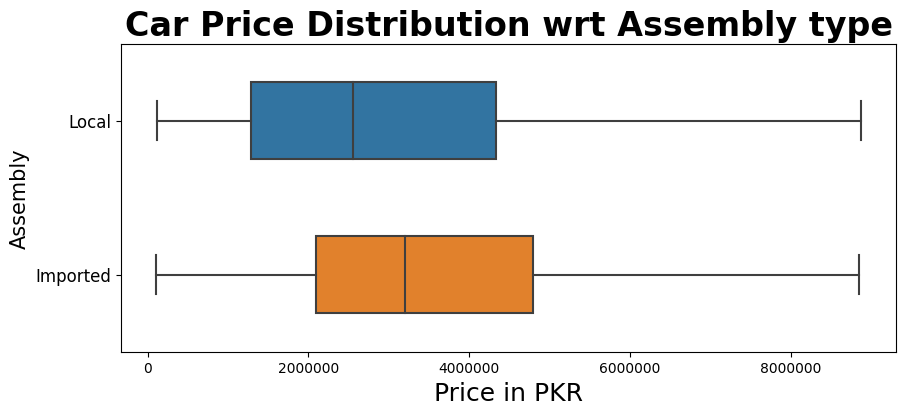

In [46]:
plt.figure(figsize=(10,4))
sns.boxplot(data=used_car_data, x="price", y="assembly", showfliers=False, width=.5)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.title('Car Price Distribution wrt Assembly type', fontdict ={'fontweight':'bold','fontsize':24})
plt.xlabel('Price in PKR', fontdict ={'fontsize':18})
plt.ylabel('Assembly', fontdict ={'fontsize':15})
plt.yticks(fontsize=12)
plt.show()

### Observation: Locally assembled cars are cheaper than imported ones

## Engine Capacity Distribution

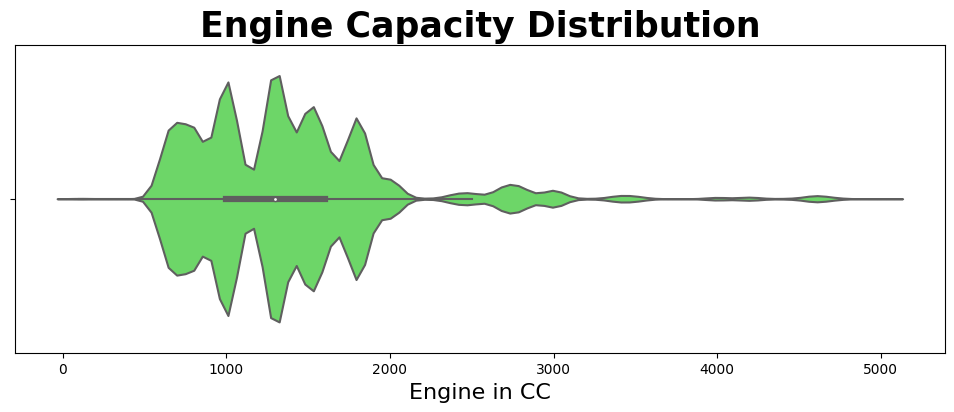

In [47]:
plt.figure(figsize=(12,4))
sns.violinplot(data=used_car_data[(used_car_data['engine']>00)&(used_car_data['engine']<5000)], x='engine', showfliers=False, width=.8, color='#5CE856')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.title('Engine Capacity Distribution', fontdict ={'fontweight':'bold','fontsize':25})
plt.xlabel('Engine in CC', fontdict ={'fontsize':16})
plt.show()

### Observation: The majority of cars have engines ranging from 600 CC to 2000 CC.

## Do old cars have more mileage than new ones?

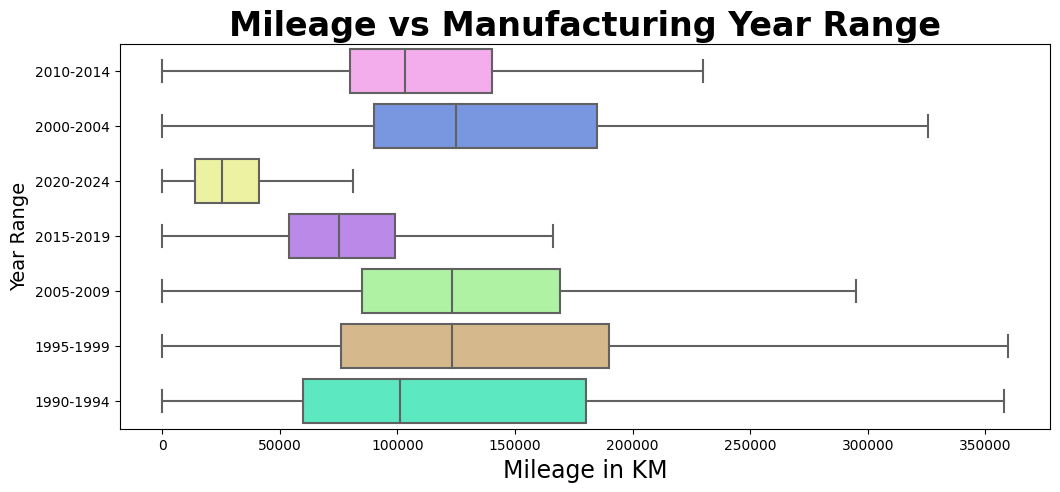

In [48]:
plt.figure(figsize=(12,5))
sns.boxplot(data=used_car_data, x="mileage", y="year_range", showfliers=False, palette=["#FFA1F5", "#688EF1", "#F8FF95", "#BC7AF9", "#A6FF96", "#E1BA7F", '#45FFCA'])
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.title('Mileage vs Manufacturing Year Range', fontdict ={'fontweight':'bold','fontsize':24})
plt.xlabel('Mileage in KM', fontdict ={'fontsize':17})
plt.ylabel('Year Range', fontdict ={'fontsize':14})
plt.show()

### Observation: If we look at the chart above, we can observe that the most recent years, i.e., 2020-2024, have the lowest mileage represented by a smaller whisker-box, whereas years before 2010 have significantly larger whisker-boxes, indicating higher mileage. Therefore, it implies that old cars have more mileage than new ones.

# Predicting used car price

In [49]:
used_car_data = pd.read_csv('/kaggle/input/pakistan-used-car-prices-2023/pakwheels_used_car_data_v02.csv')

## Have a look at metadata

In [50]:
used_car_data.describe(include='all')

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
count,7.787800e+04,77878,24189,68974,77878,77878,73099.000000,77875.000000,77878,76972,76398,77878,77878.000000,7.729500e+04
unique,NaN,297,1,21,68,435,NaN,NaN,2,3,396,121,NaN,NaN
top,NaN,Lahore,Imported,Sedan,Toyota,Corolla,NaN,NaN,Automatic,Petrol,White,Islamabad,NaN,NaN
freq,NaN,16674,24189,30193,24910,12871,NaN,NaN,42763,70620,21444,18942,NaN,NaN
mean,7.809878e+06,NaN,NaN,NaN,NaN,NaN,2012.812610,1408.072550,NaN,NaN,NaN,NaN,91109.192750,3.883232e+06
std,2.599523e+05,NaN,NaN,NaN,NaN,NaN,7.516685,704.459947,NaN,NaN,NaN,NaN,89275.336173,5.759480e+06
min,2.748970e+05,NaN,NaN,NaN,NaN,NaN,1990.000000,3.000000,NaN,NaN,NaN,NaN,1.000000,1.100000e+05
25%,7.805760e+06,NaN,NaN,NaN,NaN,NaN,2007.000000,1000.000000,NaN,NaN,NaN,NaN,34000.000000,1.450000e+06
50%,7.865805e+06,NaN,NaN,NaN,NaN,NaN,2015.000000,1300.000000,NaN,NaN,NaN,NaN,80000.000000,2.700000e+06
75%,7.910334e+06,NaN,NaN,NaN,NaN,NaN,2019.000000,1600.000000,NaN,NaN,NaN,NaN,123456.000000,4.500000e+06


## Do we have missing values

In [51]:
used_car_data.isna().sum()

addref              0
city                0
assembly        53689
body             8904
make                0
model               0
year             4779
engine              3
transmission        0
fuel              906
color            1480
registered          0
mileage             0
price             583
dtype: int64

In [52]:
used_car_data['assembly'] = used_car_data['assembly'].fillna('Local')
assert used_car_data['assembly'].isna().sum() == 0

In [53]:
used_car_data[used_car_data['body'].isna()]['model'].value_counts().head(80)

model
Corolla    714
Civic      399
Alto       307
Prius      243
Land       240
          ... 
Acty        20
Rav4        20
Pearl       19
Town        19
Patrol      18
Name: count, Length: 80, dtype: int64

In [54]:
model_list = pd.DataFrame(used_car_data[used_car_data['body'].isna()]['model'].value_counts().head(50)).index
print('No of missing values before replacing', used_car_data['body'].isna().sum())
model_body = {}
for model in model_list:
    model_body[model] = used_car_data[used_car_data['model']==model]['body'].value_counts().idxmax()
used_car_data['body'] = used_car_data['body'].fillna(used_car_data['model'].map(model_body))
print('No of missing values after replacing', used_car_data['body'].isna().sum())

No of missing values before replacing 8904
No of missing values after replacing 2197


## Is it missing at random?

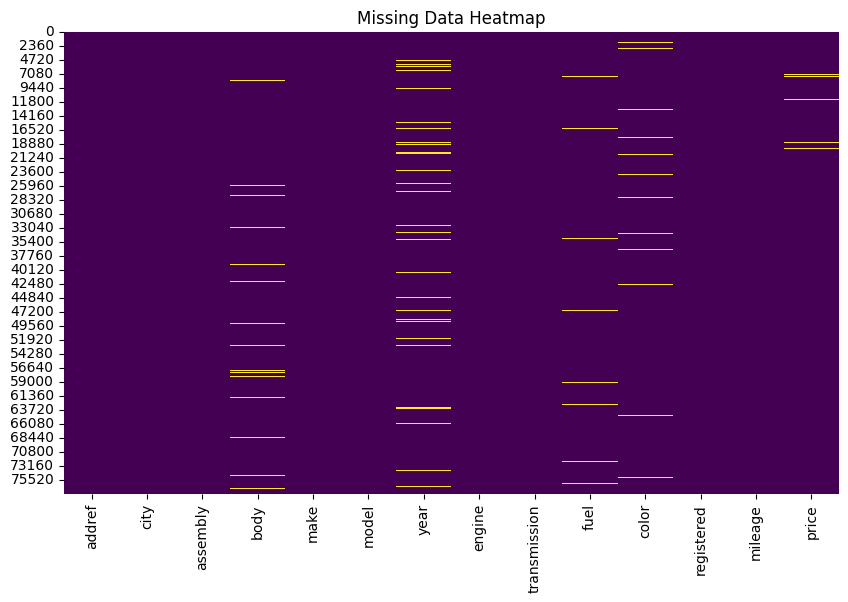

In [55]:
plt.figure(figsize=(10, 6))
sns.heatmap(used_car_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

#### The plot shows that the data is missing at random so let work on these

In [56]:
round(used_car_data[(~used_car_data.isnull())].drop(columns=['body']).isnull().any(axis=1).sum()/used_car_data.shape[0]*100,2)

9.37

### we are going to lose approx 9.37% data if we drop rows having missing values

## Drop rows having missing data points

In [57]:
used_car_data = used_car_data.dropna()

In [58]:
used_car_data.shape

(68756, 14)

### feature engineering

In [59]:
color = ["white", "black", "gray", "grey", "silver", "red", "blue", "green", "brown", "yellow", "orange", "gold", "beige", "bronze", "titanium", "maroon"]
def color_change(color_row):
    for col in color:
        if col in color_row.lower():
            return col.capitalize()
    return color_row.capitalize()
used_car_data['color'] = used_car_data['color'].apply(lambda x: color_change(x))
used_car_data['color'] = used_car_data['color'].replace(['Night blacl', 'Timeless back', 'Galaxy balck'], 'Black')
used_car_data['color'] = used_car_data['color'].replace(['Gray', 'Gun metallic'], 'Grey')
used_car_data['color'] = used_car_data['color'].replace('Rio tomato', 'Red')
used_car_data['color'] = used_car_data['color'].replace('Yellow', 'Gold')
used_car_data['color'] = used_car_data['color'].replace(['Alpine whire', 'Whitw', 'Precious wite pearl', 'Moonstone metallic'], 'White')
used_car_data['color'].nunique()


45

In [60]:
used_car_data['year_range'] = used_car_data['year'].apply(lambda x: year_category(x))
used_car_data.sample(3)

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price,year_range
31700,7902102,Islamabad,Imported,Hatchback,Suzuki,Wagon,2020.0,660.0,Automatic,Hybrid,Beige,Un-Registered,13000,3675000.0,2020-2024
14420,7929979,Rawalpindi,Imported,Crossover,Honda,Vezel,2016.0,1500.0,Automatic,Petrol,Silver,Islamabad,34540,6900000.0,2015-2019
33973,7897549,Karachi,Imported,SUV,Toyota,Prado,1997.0,3000.0,Automatic,Diesel,Beige,Karachi,116000,4500000.0,1995-1999


## Removing outliers and unimportant features

In [61]:
ambigous_index = list(used_car_data[(used_car_data['mileage']<10000)&(used_car_data['year']<2000)].index)
ind = list(used_car_data[(used_car_data['engine']<600)|(used_car_data['engine']>6600)].index)
ambigous_index = ambigous_index + ind + [17405, 46696, 210, 2113, 197, 1649, 646, 4071, 56430]

In [62]:
ambigous_index = np.array(ambigous_index).ravel().reshape(552,)
ambigous_index.shape

(552,)

In [63]:
to_be_dropped = used_car_data.loc[ambigous_index]

In [64]:
used_car_data = used_car_data[~used_car_data['addref'].isin(to_be_dropped['addref'])]

In [65]:
used_car_data = used_car_data.drop(columns=['addref', 'city', 'year', 'body'])
used_car_data.head()

,assembly,make,model,engine,transmission,fuel,color,registered,mileage,price,year_range
0,Local,Toyota,Corolla,1300.0,Manual,Petrol,Silver,Lahore,145000,2870000.0,2010-2014
1,Local,Honda,City,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0,2000-2004
2,Local,Toyota,Yaris,1300.0,Manual,Petrol,White,Punjab,60500,3585000.0,2020-2024
3,Local,Suzuki,Swift,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0,2015-2019
4,Local,Honda,Civic,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0,2015-2019


In [66]:
used_car_data.shape

(68210, 11)

## Importing python packages for ML

In [67]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from math import sqrt

### Label encoding of categorical variables

In [68]:
categorical_columns = ['assembly', 'make', 'model', 'transmission', 'fuel', 'color', 'registered', 'year_range']
label_encoder = LabelEncoder()
for col in categorical_columns:
    used_car_data[col] = label_encoder.fit_transform(used_car_data[col])

In [69]:
used_car_data.sample(4)

,assembly,make,model,engine,transmission,fuel,color,registered,mileage,price,year_range
29874,1,45,76,1300.0,1,2,6,90,90000,2395000.0,4
36027,0,45,196,1800.0,0,1,43,53,197100,4500000.0,4
66659,1,45,76,1800.0,0,2,43,90,49000,6450000.0,6
18187,1,19,67,1600.0,1,2,18,90,123456,1050000.0,1


## Train Test Split

In [70]:
X = used_car_data.drop(columns=['price'])
y = used_car_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Linear Regression

In [71]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared root Error:", sqrt(mse))
print("R-squared:", round(r2*100,4))

Mean Squared root Error: 3353663.098983003
R-squared: 52.5384


### high msqe and low r2 score indicates that linear regresssion is not feasible for this dataset

## Random forest

In [72]:
rf_model = RandomForestRegressor()
param_grid = {
    'n_estimators': [50], #we will use large number of tress after findin optimal parameters to minimize runtime
    'max_depth': [6, 12, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score (Neg Mean Squared Error): ", -grid_search.best_score_)

Best Parameters:  {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score (Neg Mean Squared Error):  1800273452674.884


In [73]:
y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2*100

93.85880360097023

In [74]:
cv_results = grid_search.cv_results_

# Extract and print the evaluation scores for each run
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']

for mean_score, std_score, params in zip(mean_test_scores, std_test_scores, cv_results['params']):
    print(f"Parameters: {params}")
    print(f"Mean Test Score: {mean_score}")
    print(f"Standard Deviation: {std_score}")
    print("=" * 80)

Parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean Test Score: -3782826400318.957
Standard Deviation: 685680934843.1815
Parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}
Mean Test Score: -3743249906938.12
Standard Deviation: 711946671611.2451
Parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 50}
Mean Test Score: -3856174735893.626
Standard Deviation: 829464057889.5496
Parameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Mean Test Score: -3816739679331.539
Standard Deviation: 743913421685.5349
Parameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 50}
Mean Test Score: -3886154632902.4893
Standard Deviation: 744028269756.4966
Parameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 50}
Mean Test Score: -3914256011243.9
Standard Deviation: 

### Finding optimal value of n_estimators

In [75]:
r2_rf = []
mse_rf = []
for i in np.arange(10,200,25):
    random_forest_model = RandomForestRegressor(n_estimators=i, max_depth=15, min_samples_leaf=1, min_samples_split=4, random_state=42)
    random_forest_model.fit(X_train, y_train)
    y_pred = random_forest_model.predict(X_test)
    mse_rf.append(round(mean_squared_error(y_test, y_pred)))
    r2_rf.append(round(r2_score(y_test, y_pred)*100,2))
print("Random Forest Metrics:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", (r2_rf))

Random Forest Metrics:
Mean Squared Error: [1491459048908, 1369725588584, 1378668588794, 1384239085963, 1382857416397, 1406264244657, 1399962639753, 1380453295811]
R-squared: [93.71, 94.22, 94.18, 94.16, 94.16, 94.07, 94.09, 94.17]


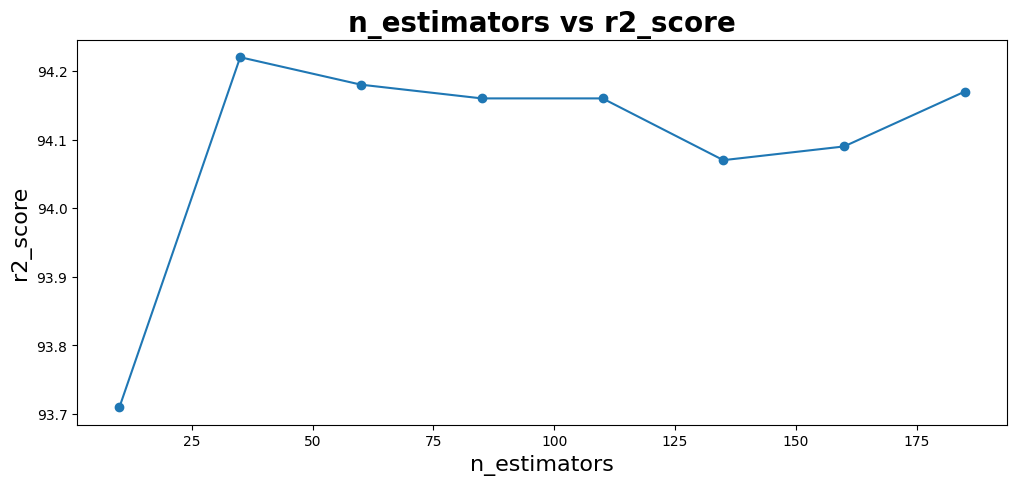

In [76]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(10,200,25), r2_rf, marker='o')
plt.title("n_estimators vs r2_score", fontdict={'fontsize':20, 'weight':'bold'})
plt.xlabel("n_estimators", fontdict={'fontsize':16})
plt.ylabel("r2_score", fontdict={'fontsize':16})
plt.show()

### n_estimators = 35 gives the best r2_score

In [77]:
random_forest_model = RandomForestRegressor(n_estimators=35, max_depth=15, min_samples_leaf=1, min_samples_split=4, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
print("Random Forest Metrics:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", round(r2_rf*100, 2))

Random Forest Metrics:
Mean Squared Error: 1369725588583.8298
R-squared: 94.22


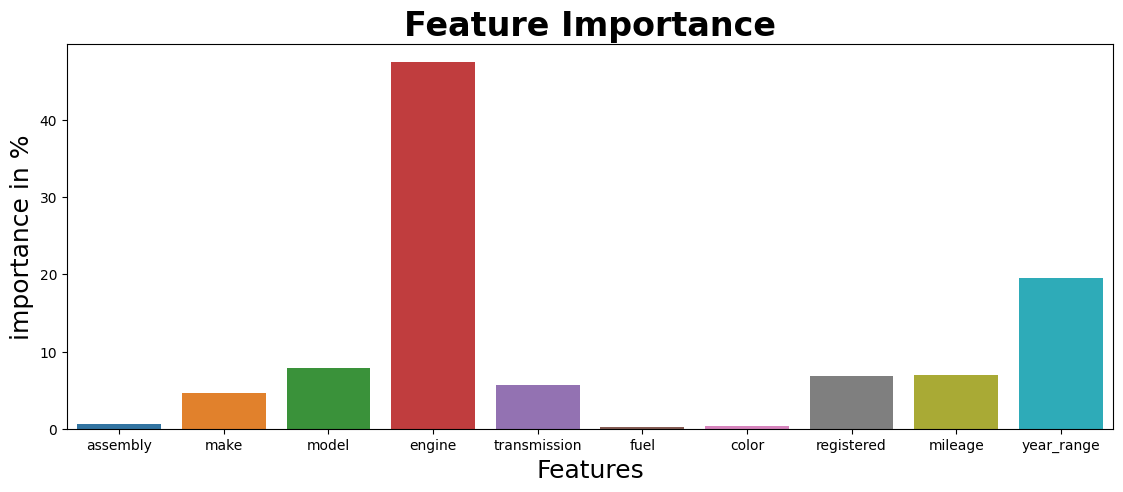

In [78]:
feature_importances = random_forest_model.feature_importances_
plt.figure(figsize=(13.5,5))
sns.barplot(x=X.columns, y=(feature_importances*100))
plt.xlabel("Features", fontdict={'fontsize':18})
plt.ylabel("importance in %", fontdict={'fontsize':18})
plt.title("Feature Importance", fontdict={'fontsize':24, 'weight':'bold'})
plt.show()

## **XGBoost Regressor**

In [79]:
xgb_regressor = xgb.XGBRegressor()

param_grid = {
    'n_estimators': [50],
    'max_depth': [4, 5, 6],
    'learning_rate': [.05, 0.1, 0.5],
    'min_child_weight': [2,3,4]
}

grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score (Neg Mean Squared Error): ", -grid_search.best_score_)

Best Parameters:  {'learning_rate': 0.5, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 50}
Best Score (Neg Mean Squared Error):  1948773761641.3413


In [80]:
y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(round(r2*100,2))

93.5


### random forest regressor performs much better than xgboost regressor.

## Polynomial Regression

In [81]:
from sklearn.preprocessing import PolynomialFeatures
mse = []
r2 = []
for i in np.arange(1,5,1):
    poly_features = PolynomialFeatures(degree=i)
    X_train_poly = poly_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    X_test_poly = poly_features.transform(X_test)
    y_pred = model.predict(X_test_poly)
    mse.append(mean_squared_error(y_test, y_pred))
    r2.append(r2_score(y_test, y_pred))


In [82]:
print("Mean squared root error: ", np.sqrt(mse))
print("r2_score: ", r2)

Mean squared root error:  [3353663.09898308 2510020.0644155  2242254.61440862 2434503.86508727]
r2_score:  [0.5253840346873337, 0.7341370221748821, 0.7878352004194986, 0.7498938244659688]


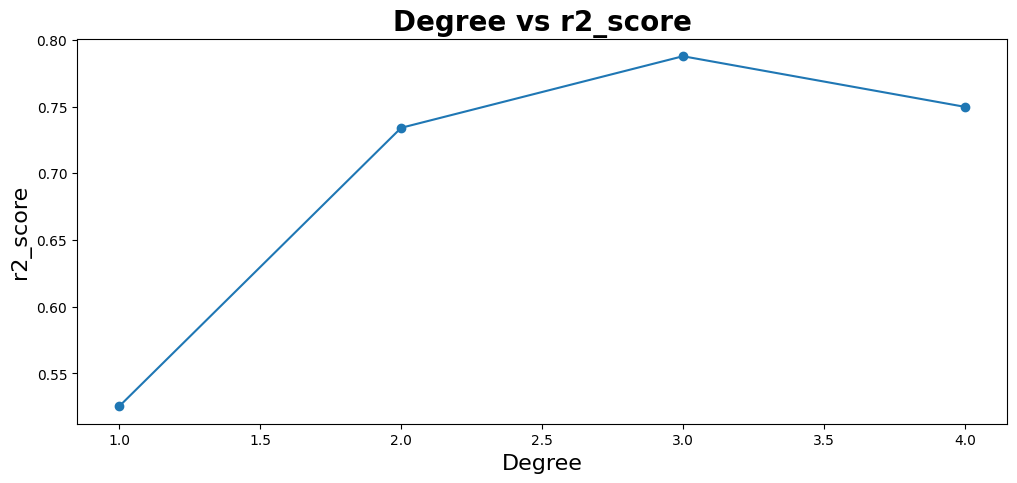

In [83]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(1,5,1), r2, marker='o')
plt.title("Degree vs r2_score", fontdict={'fontsize':20, 'weight':'bold'})
plt.xlabel("Degree", fontdict={'fontsize':16})
plt.ylabel("r2_score", fontdict={'fontsize':16})
plt.show()

### 3rd degree polynomial regression performs the best but its still worse than the random forest model.

## Visualizing performance of various predicting models

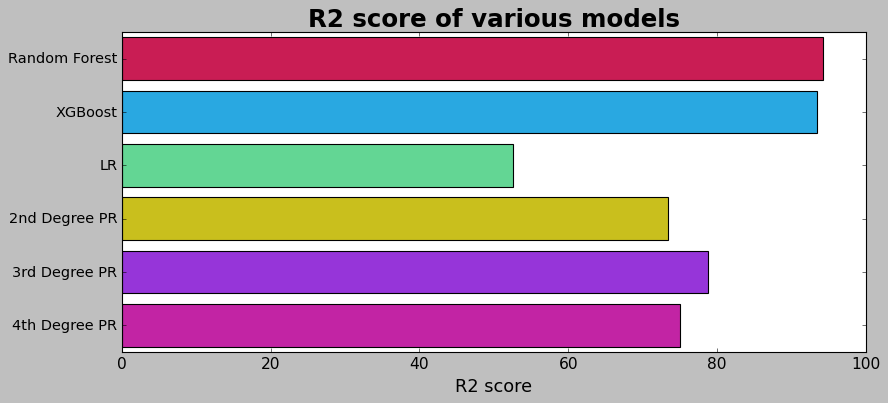

In [84]:
plt.style.use('classic')
categories = ['Random Forest', 'XGBoost', 'LR', '2nd Degree PR', '3rd Degree PR', '4th Degree PR']
r2_score = [94.22, 93.5, 52.54, 73.41, 78.78, 74.99]
custom_colors = ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#dc0ab4"]
plt.figure(figsize=(12,5))
sns.barplot(x = r2_score, y=categories, palette=custom_colors)
plt.title('R2 score of various models', fontdict={'fontsize':22, 'weight':'bold'})
plt.xlabel('R2 score', fontdict={'fontsize':16})
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.show()